In [1]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.preprocessing import image

C:\Users\vikash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

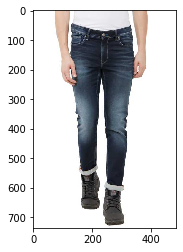

In [2]:
img = image.load_img("D:/dataset/flipkart/train/jeans/1 (2).jpeg")
plt.imshow(img)

In [3]:
cv2.imread("D:/dataset/flipkart/train/jeans/1 (2).jpeg").shape


(737, 485, 3)

In [4]:
cv2.imread("D:/dataset/flipkart/train/jeans/1 (2).jpeg")

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]]

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)


In [6]:
train_dataset = train.flow_from_directory("D:/dataset/flipkart/train",
                                     target_size = (200,200),
                                     batch_size = 10,
                                     class_mode = 'binary')
validation_dataset = train.flow_from_directory("D:/dataset/flipkart/validation",
                                     target_size = (200,200),
                                     batch_size = 10,
                                     class_mode = 'binary')
                                     

Found 240 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'jeans': 0, 'trousers': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
from tensorflow.keras import optimizers

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape = (200,200,3)),
                                                           tf.keras.layers.MaxPool2D(2,2),
                                                           tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                                            tf.keras.layers.MaxPool2D(2,2),
                                                            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                                            tf.keras.layers.MaxPool2D(2,2),
                                                            tf.keras.layers.Dropout(0.5),
                                                            tf.keras.layers.Flatten(),
                                                            tf.keras.layers.Dense(128,activation = 'relu'),
                                                            tf.keras.layers.Dense(1,activation = 'sigmoid')])
                                                            
    
    
                                                            


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
model.compile(loss= 'binary_crossentropy',
            optimizer= tf.keras.optimizers.SGD(lr=0.001, nesterov = True),
             metrics =['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0

In [13]:
from keras import backend as k
from keras.callbacks import ReduceLROnPlateau, EarlyStopping , ModelCheckpoint

In [21]:
checkpoint = ModelCheckpoint('D:/dataset/flipkart/Checkpoint',
                            monitor = 'val_loss',
                            save_best_only = True,
                            verbose = 1)


In [15]:
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [16]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

In [17]:
callbacks = [checkpoint, earlystop, reduce_lr]

In [31]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 50,
                      epochs =10 ,
                      verbose = 1,
                      callbacks = callbacks,
                      validation_data = validation_dataset)

Epoch 1/10
49/50 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9898
Epoch 00001: val_loss did not improve from 0.23139
50/50 [==============================] - 24s 488ms/step - loss: 0.0447 - acc: 0.9900 - val_loss: 0.2630 - val_acc: 0.8990
Epoch 2/10
49/50 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9878
Epoch 00002: val_loss did not improve from 0.23139
50/50 [==============================] - 24s 477ms/step - loss: 0.0359 - acc: 0.9880 - val_loss: 0.2666 - val_acc: 0.9091
Epoch 3/10
49/50 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9898
Epoch 00003: val_loss did not improve from 0.23139
50/50 [==============================] - 23s 468ms/step - loss: 0.0320 - acc: 0.9900 - val_loss: 0.2792 - val_acc: 0.9091
Epoch 4/10
49/50 [============================>.] - ETA: 0s - loss: 0.0294 - acc: 0.9939
Epoch 00004: val_loss did not improve from 0.23139
Restoring model weights from the end of the best epoch

Epoch 00004: Reduc

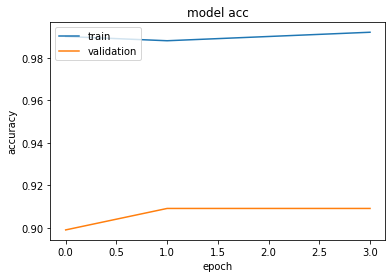

In [32]:
plt.plot(model_fit.history['acc'])
plt.plot(model_fit.history['val_acc'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

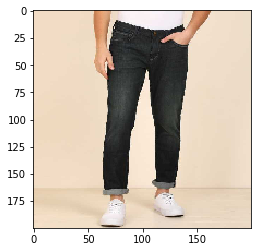

its a jeans


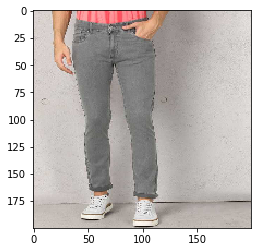

its a jeans


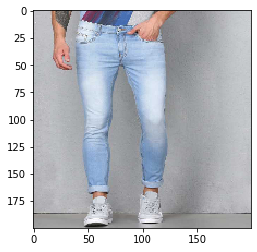

its a jeans


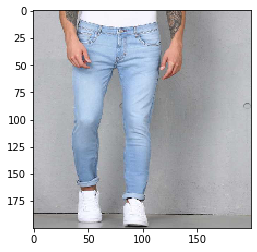

its a jeans


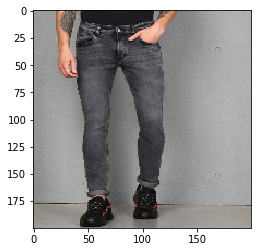

its a jeans


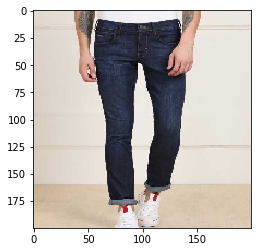

its a jeans


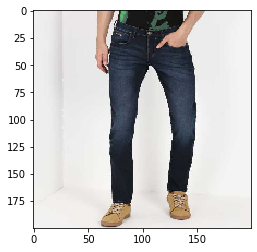

its a trouser


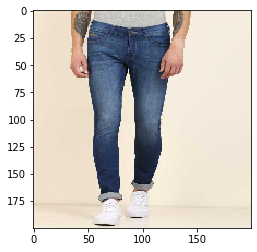

its a jeans


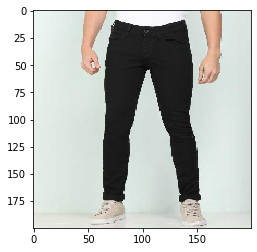

its a trouser


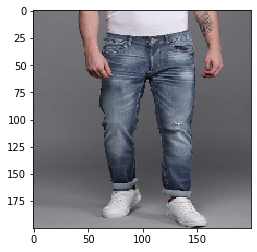

its a jeans


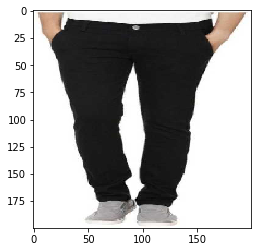

its a trouser


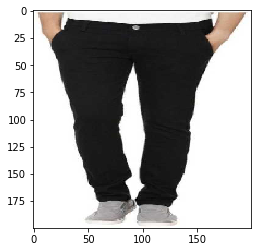

its a trouser


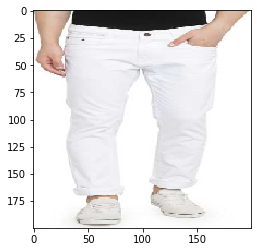

its a trouser


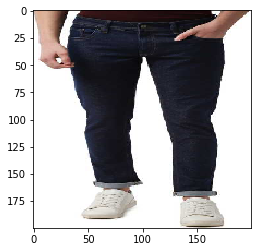

its a trouser


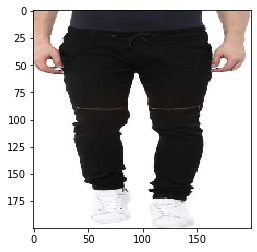

its a trouser


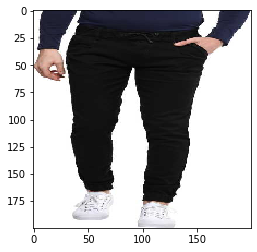

its a trouser


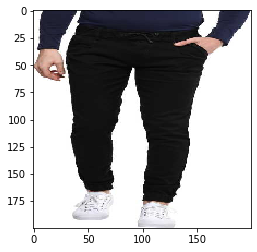

its a trouser


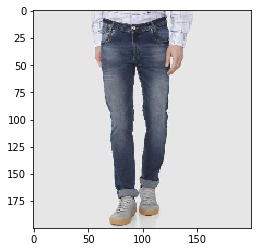

its a jeans


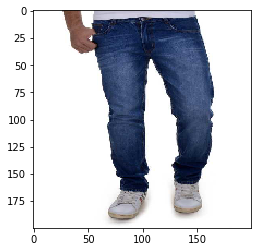

its a jeans


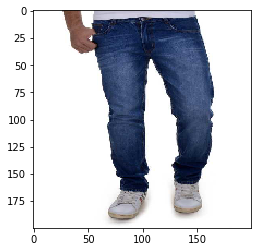

its a jeans


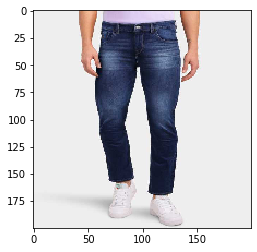

its a jeans


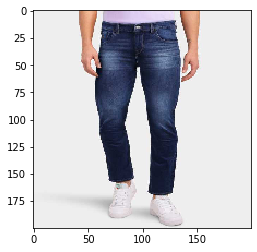

its a jeans


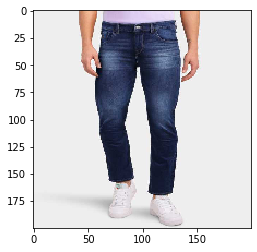

its a jeans


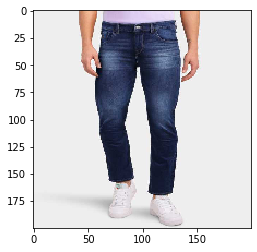

its a jeans


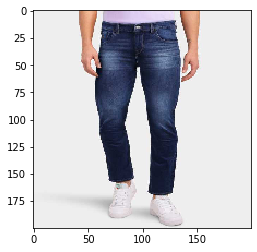

its a jeans


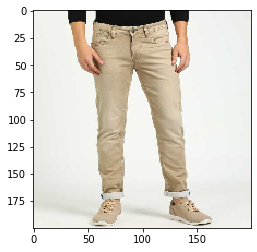

its a trouser


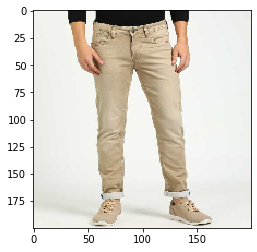

its a trouser


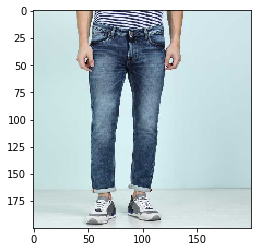

its a jeans


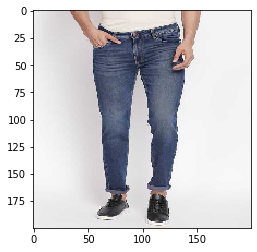

its a jeans


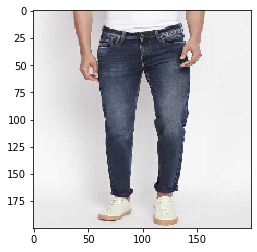

its a jeans


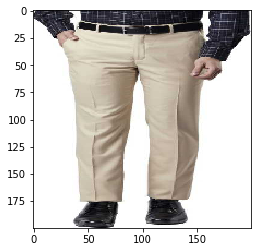

its a trouser


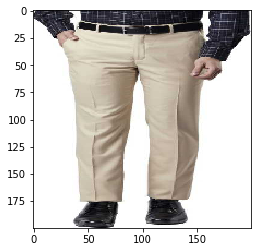

its a trouser


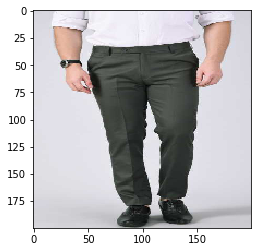

its a trouser


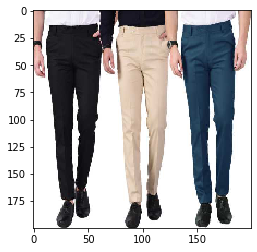

its a trouser


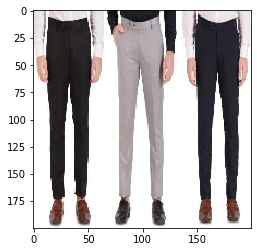

its a trouser


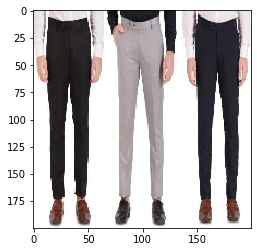

its a trouser


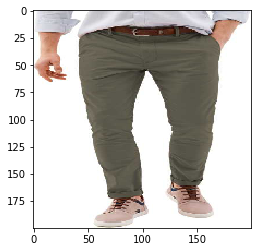

its a trouser


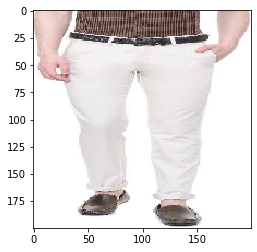

its a jeans


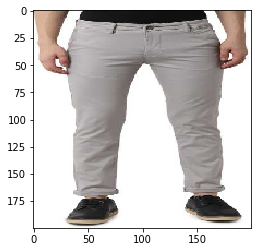

its a trouser


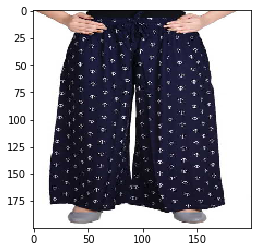

its a jeans


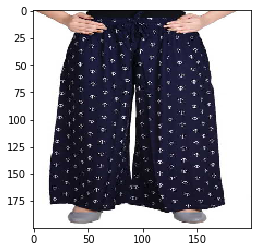

its a jeans


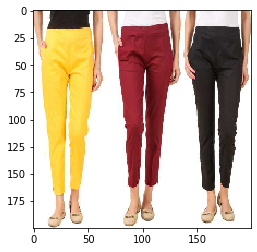

its a trouser


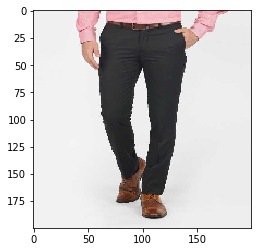

its a trouser


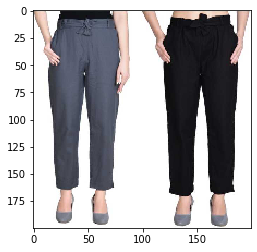

its a trouser


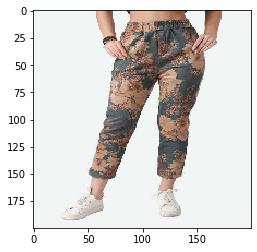

its a jeans


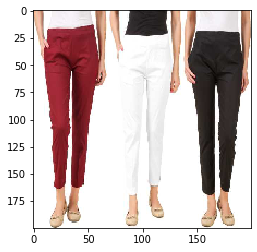

its a trouser


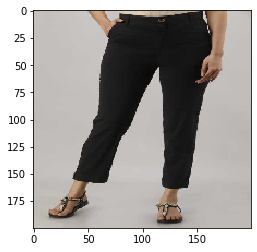

its a trouser


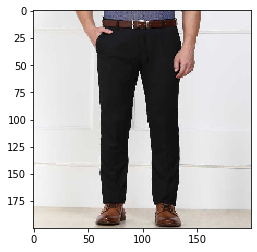

its a trouser


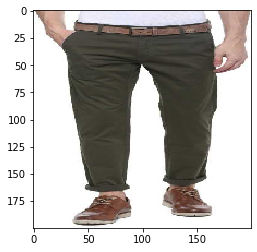

its a trouser


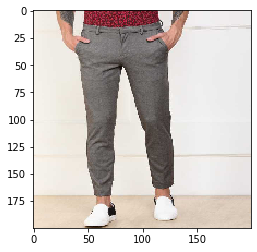

its a trouser


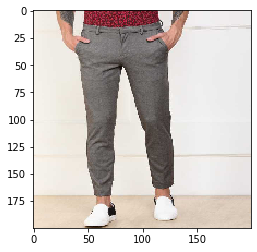

its a trouser


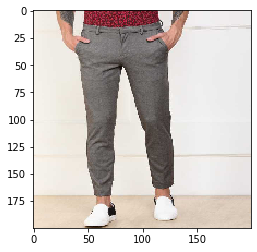

its a trouser


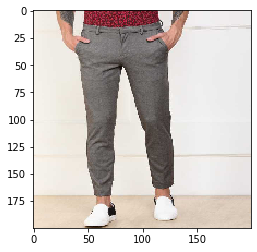

its a trouser


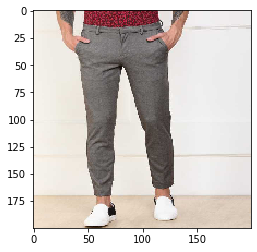

its a trouser


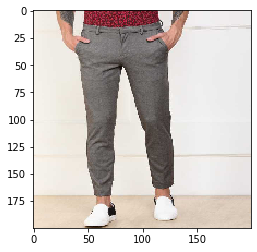

its a trouser


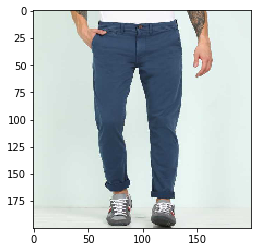

its a jeans


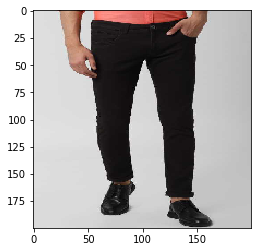

its a trouser


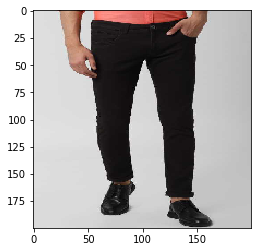

its a trouser


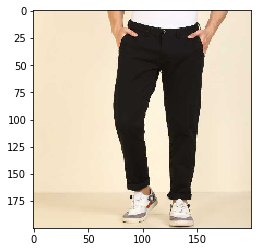

its a trouser


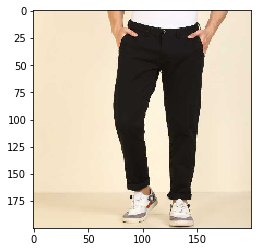

its a trouser


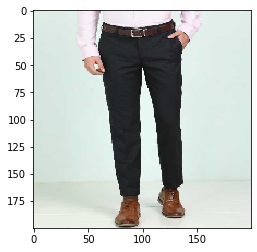

its a trouser


In [26]:
dir_path = 'D:/dataset/flipkart/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x =np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    pred = model.predict(images)
    if pred == 0:
        print('its a jeans')
    else:
        print('its a trouser')

    